# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


Bad key "text.kerning_factor" on line 4 in
/Users/miriam/miniconda3/envs/analytics_env/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/Users/miriam/miniconda3/envs/analytics_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data = datasets.load_wine()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
model = KMeans(n_clusters=7)
labels = model.fit_predict(X)

#Mean Silhouette Coefficient of all samples
#(b - a) / max(a, b)
#a -> mean intra-cluster distance 
#b -> distance between a sample and the nearest cluster that the sample is not a part of
print(silhouette_score(X,labels))

0.5616196384056903


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [4]:
model = KMeans(n_clusters=5)
labels = model.fit_predict(X)
print(silhouette_score(X,labels))

0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [5]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(X)
print(silhouette_score(X,labels))

0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

/Users/miriam/miniconda3/envs/analytics_env/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fde92d11ee0>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=False)

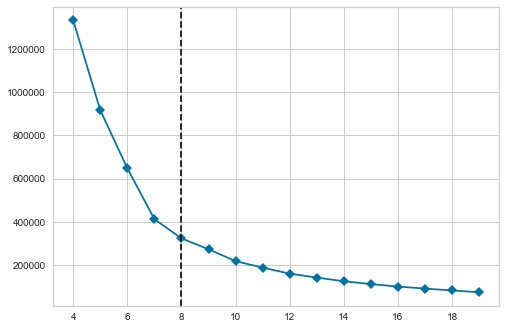

In [6]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,20), metric="distortion", timings=False)
# Fit the data to the visualizer 
visualizer.fit(X) 

/Users/miriam/miniconda3/envs/analytics_env/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fde93b0b310>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=False)

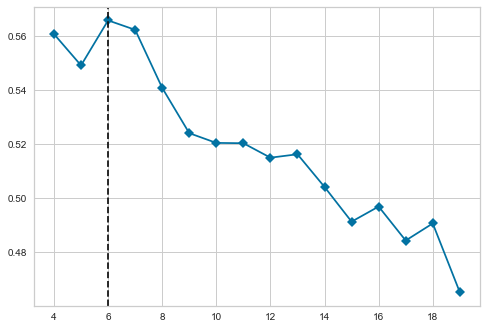

In [7]:
visualizer = KElbowVisualizer(model, k=(4,20), metric="silhouette", timings=False)
visualizer.fit(X) 

/Users/miriam/miniconda3/envs/analytics_env/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fde93c33f40>,
                 k=None, locate_elbow=True, metric='calinski_harabasz',
                 model=None, timings=False)

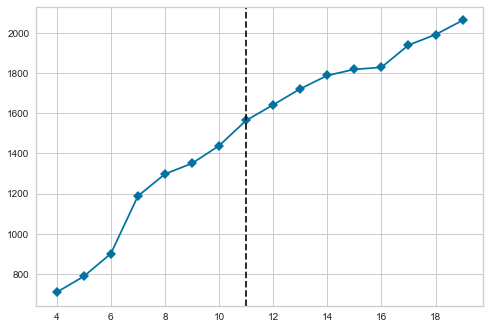

In [8]:
visualizer = KElbowVisualizer(model, k=(4,20), metric="calinski_harabasz", timings=False)
visualizer.fit(X) 

In [9]:
#Best number of clusters to use --> 6

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

/Users/miriam/miniconda3/envs/analytics_env/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fde93b24550>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=False)

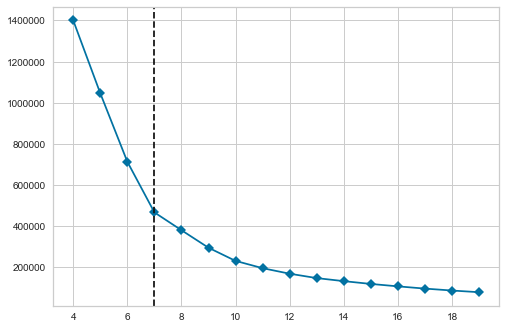

In [10]:
#AgglomerativeClustering -> Recursively merges the pair of 
#clusters that minimally increases a given linkage distance.

# Instantiate the clustering model and visualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(4,20), metric="distortion", timings=False)
# Fit the data to the visualizer 
visualizer.fit(X) 

/Users/miriam/miniconda3/envs/analytics_env/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fde93e52dc0>,
                 k=None, locate_elbow=True, metric='calinski_harabasz',
                 model=None, timings=False)

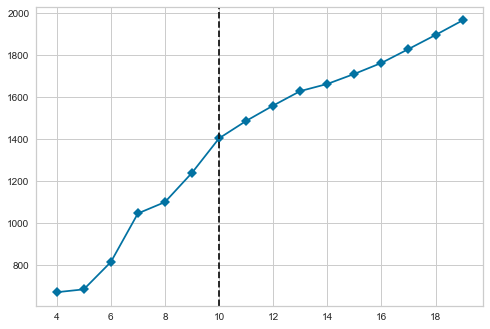

In [11]:
visualizer = KElbowVisualizer(model, k=(4,20), metric="calinski_harabasz", timings=False)
visualizer.fit(X) 

/Users/miriam/miniconda3/envs/analytics_env/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fde93f5be20>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=False)

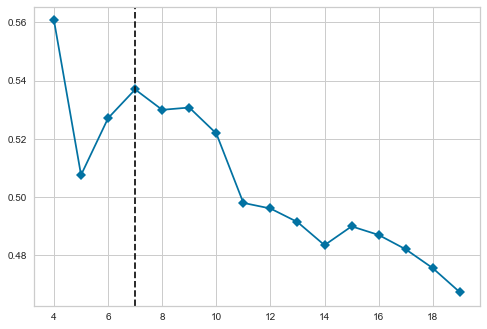

In [12]:
visualizer = KElbowVisualizer(model, k=(4,20), metric="silhouette", timings=False)
visualizer.fit(X) 

In [13]:
#Best number of clusters to use --> 7

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

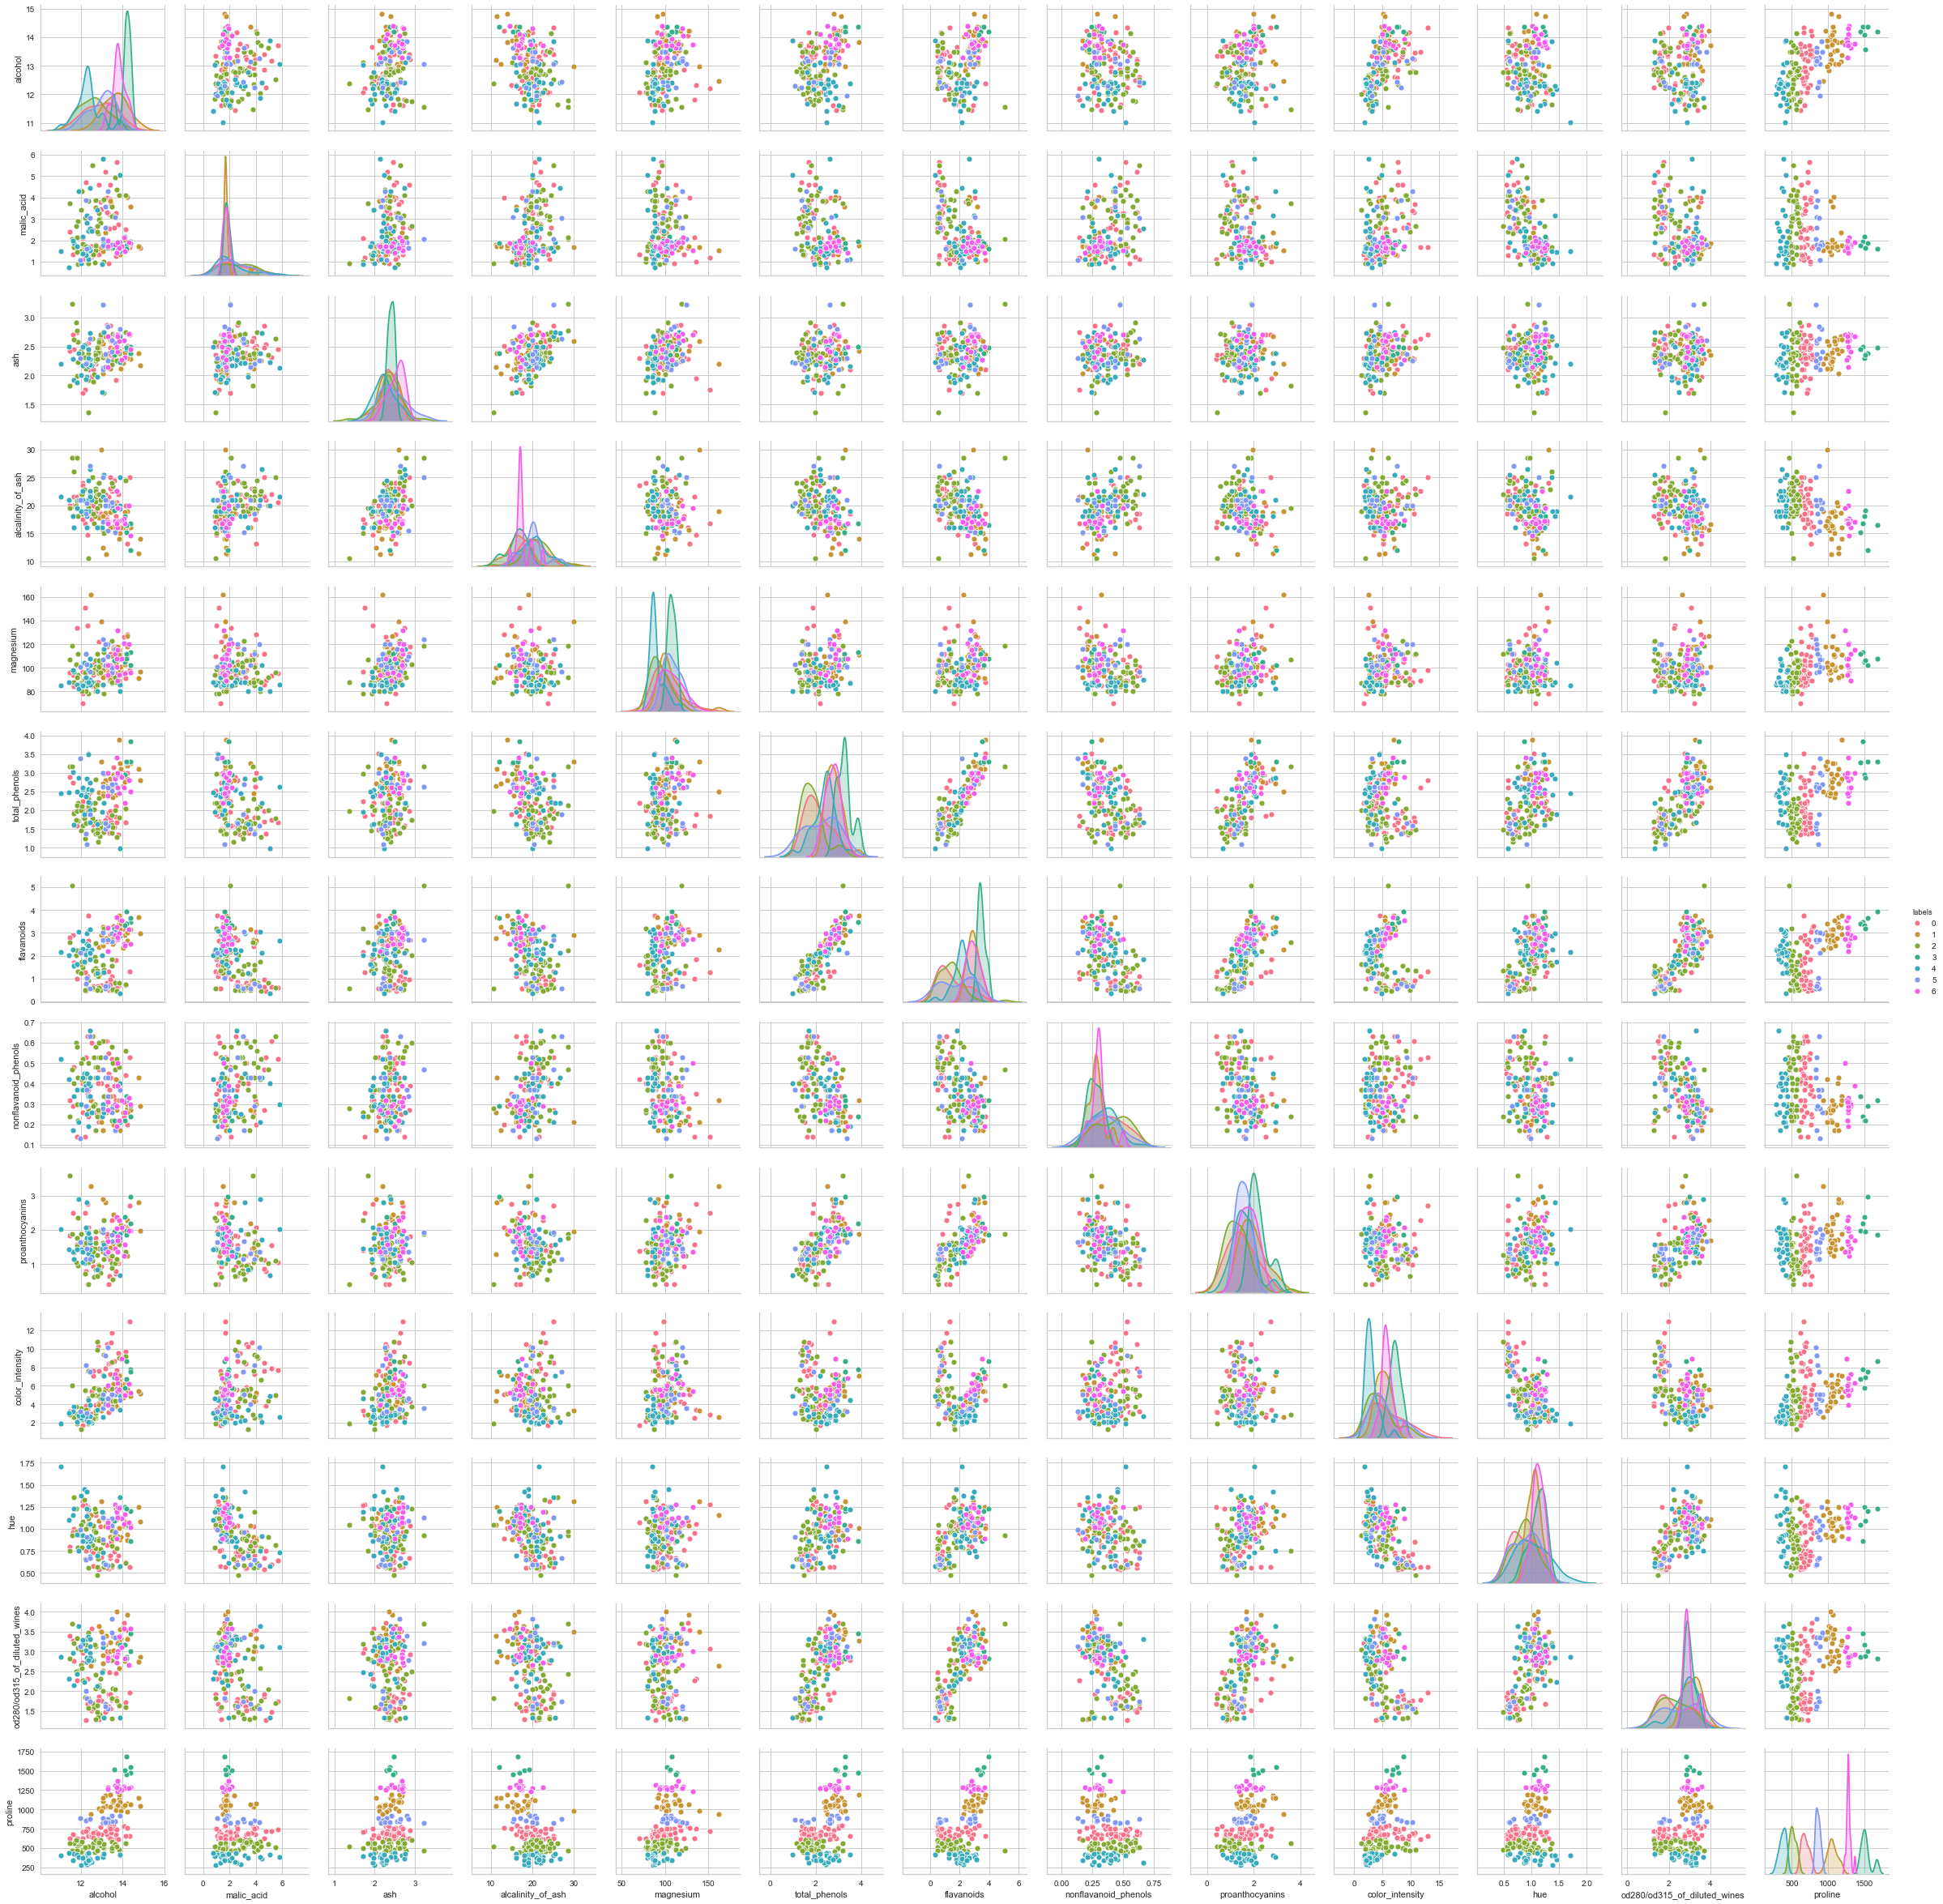

In [14]:
model = AgglomerativeClustering(n_clusters=7)
X['labels'] = model.fit_predict(X)
sns.pairplot(X, hue='labels')

In [15]:
X.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,0.015926
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,-0.108384
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,0.070468
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,-0.006633
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.012614
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,0.177471
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,0.238497
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,-0.126643
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,0.061547
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,-0.129698


## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

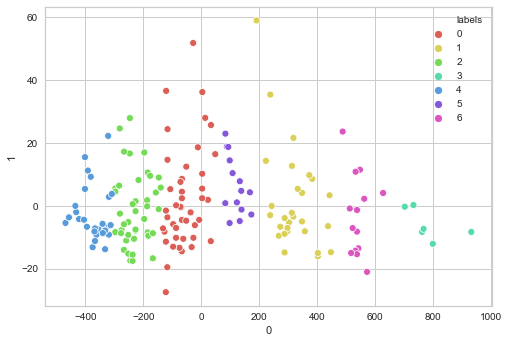

In [16]:
#Linear dimensionality reduction using Singular Value Decomposition 
#of the data to project it to a lower dimensional space. 

#n_components -> number of components to keep
pca   = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X))
X_pca['labels'] = X['labels']
sns.scatterplot(x=X_pca[0], y=X_pca[1],
                palette=sns.color_palette("hls", 7),
                hue=X_pca['labels'],
                legend="full",
                alpha=1)

In [17]:
#The first two principal components actually tell us a great deal 
#about the specific types of features.

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

t-Distributed Stochastic Neighbor Embedding (t-SNE) is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. Contrary to PCA it is not a mathematical technique but a probablistic one. 

“t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding”.

Essentially it looks at the original data that is entered into the algorithm and looks at how to best represent this data using less dimensions by matching both distributions.

The way it does this is computationally quite heavy and therefore there are some (serious) limitations to the use of this technique. For example one of the recommendations is that, in case of very high dimensional data, you may need to apply another dimensionality reduction technique before using t-SNE.

In [18]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 18.134782
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.987015
[t-SNE] KL divergence after 300 iterations: 0.107135


In [19]:
#X

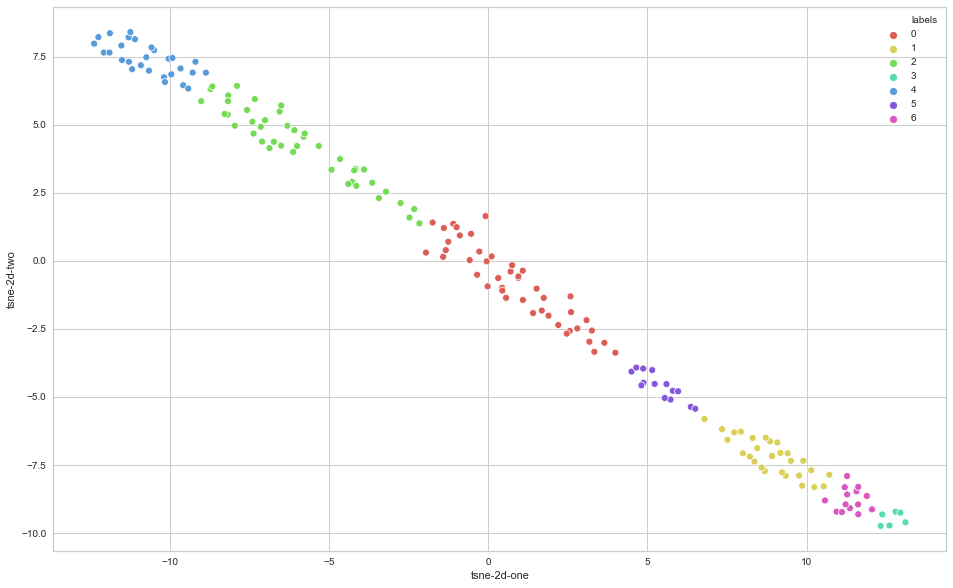

In [21]:
X['tsne-2d-one'] = tsne_results[:,0]
X['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", 
    y="tsne-2d-two",
    hue="labels",
    data=X,
    legend="full",
    alpha=1,
    palette=sns.color_palette("hls", 7),
)